In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn import decomposition, cluster
import xarray as xr
import os
from src.clustering.clustering_utils import *
from src.Enumerations import Season, Experiments
from src.clustering.cluster_computation import compute_and_save_cluster
from src.utils import *
#%run /work/aa0238/a271093/Scripts/MOAAP/src/clustering/clustering_preprocess_data.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
num_cluster =5
level=70000
season = Season.SON

In [15]:
#save_as_pkl(d['lat'],"/work/aa0238/a271093/data/clustering/regime_output/centroids/latitude")
#save_as_pkl(d['lon'],"/work/aa0238/a271093/data/clustering/regime_output/centroids/longitude")

# Compute and save the ERA5 reference regime clusters and PCs (1984-2014)

In [16]:
d=compute_and_save_cluster(Experiments.ERA5,
                           season = season,
                           num_iter=1000,
                           save_pca=True,
                           level=level,
                           num_cluster = num_cluster,
                           save_kmeans = True,
                           save_centroids = True,
                           save_BMUs = True
                          )

##############################
ERA5
##############################
fitted new pca
saved pca /work/aa0238/a271093/data/clustering/regime_output/PCA/PCA_ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_SON_fldmean_detrend_del29feb_aac_20PCs
fitted new kmeans
saved kmeans /work/aa0238/a271093/data/clustering/regime_output/Kmeans/Kmeans_ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_SON_fldmean_detrend_del29feb_aac_20PCs_5clusters
saved BMUs in /work/aa0238/a271093/data/clustering/regime_output/BMU/ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_SON_fldmean_detrend_del29feb_aac_20PCs_5clusters.csv
saved centroids in /work/aa0238/a271093/data/clustering/regime_output/centroids/Centroids_ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_SON_fldmean_detrend_del29feb_aac_20PCs_5clusters


# plot ERA5 reference regime centroids 

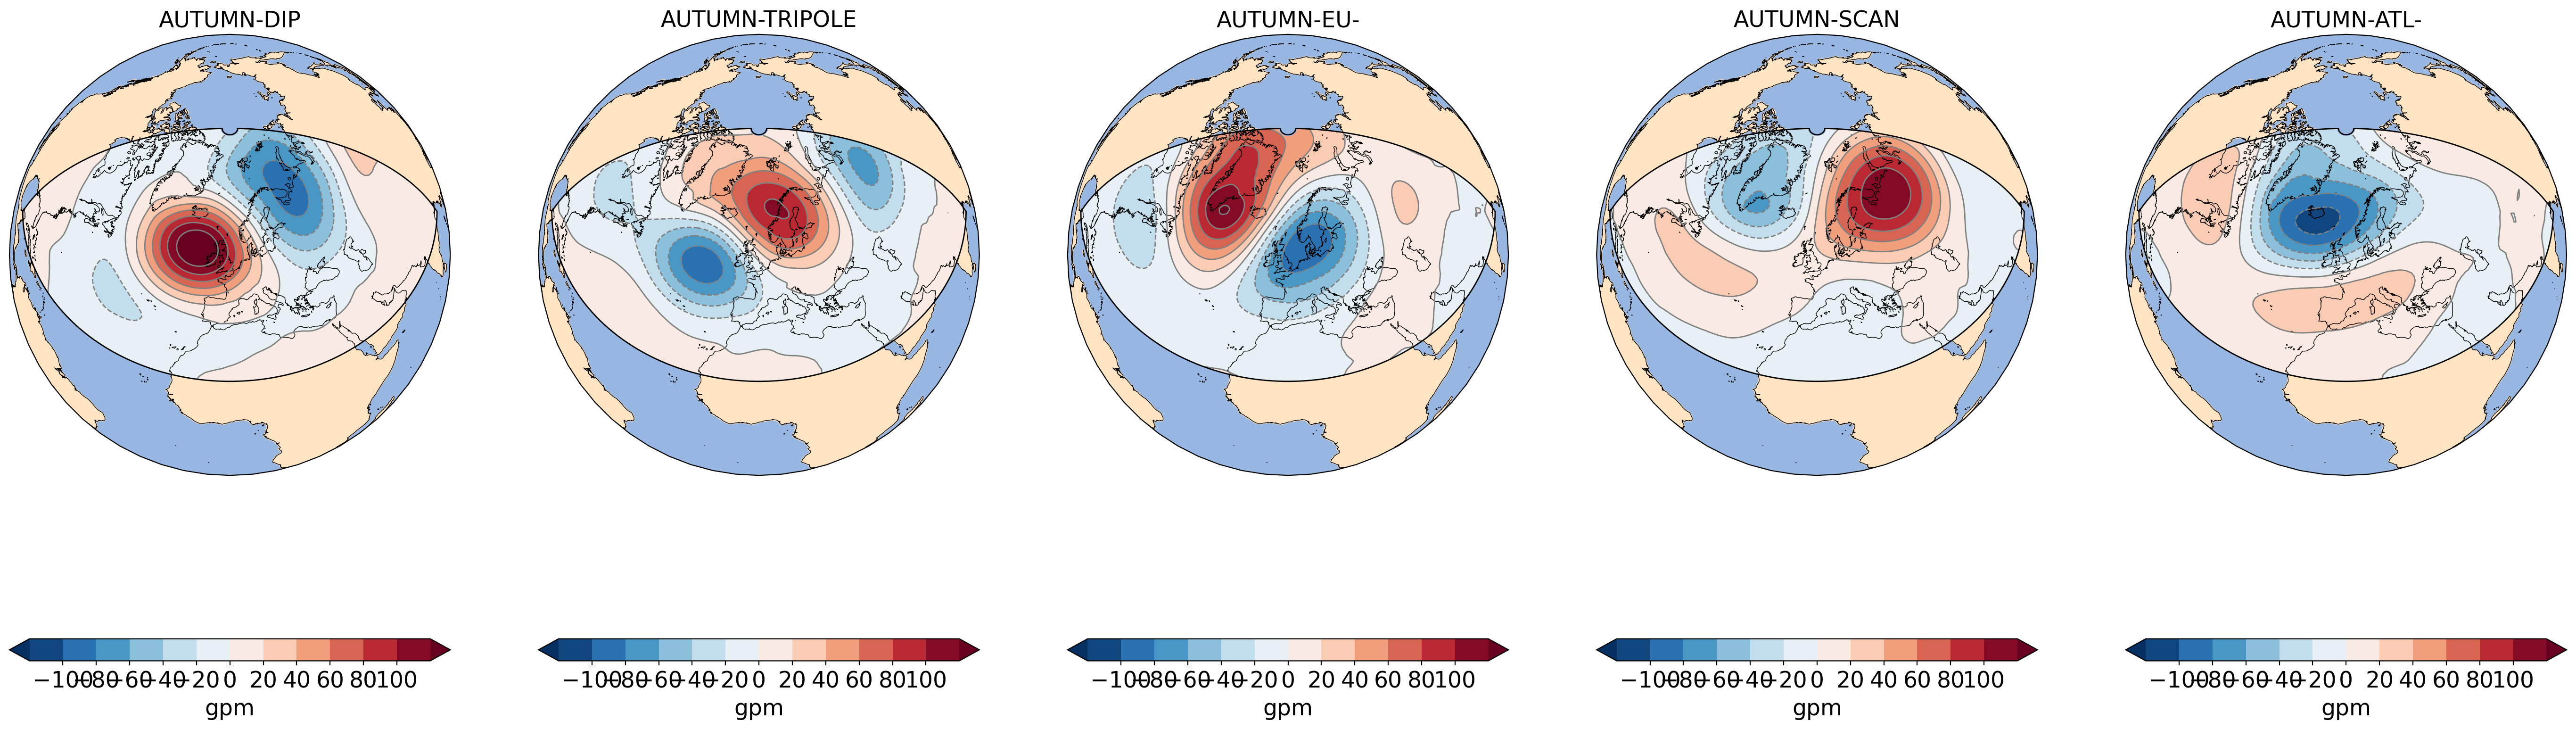

In [22]:
lat = d['lat']
lon = d['lon']
plot_dat = d['cluster_centers'].reshape(-1,lat.size,lon.size)

fig_cluster = plot_cluster_3D(plot_dat,lat,lon,
                                plot_size=(35, 15),
                                plot_shape=[1,num_cluster],
                                cbar_size=1,
                                cbar_ticks=np.arange(-100,101,20),
                                font_size=17,
                                unit='gpm',
                                color_lev = np.arange(-120,121,20),
                                titles =list(cluster_names_dict.values()))



# Set regime names according to the ERA5 Kmeans result

In [23]:
cluster_names_dict = {0:'AUTUMN-DIP',
                      1:'AUTUMN-TRIPOLE',
                      2:'AUTUMN-EU-',
                      3:'AUTUMN-SCAN',
                      4:"AUTUMN-ATL-"
                      }

#ERA_kmeans_pkl_file = "/work/aa0238/a271093/data/clustering/regime_output/Kmeans/Kmeans_ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_DJF_fldmean_detrend_del29feb_aac_20PCs_4clusters"

#add_regime_names_to_pkl_file(regime_names_dict, ERA_kmeans_pkl_file)

# 1.Project Experiment gph data to PCs computed from ERA5 
# 2.Allocate the Experiment gph data to the different ERA5 clusters wihtin the reduced phase phase

In [24]:
pca_ref = f'/work/aa0238/a271093/data/clustering/regime_output/PCA/PCA_ERA5_gph{level}_1984_2014_reglonlat_-90_90_20_88_1deg_{season.name}_fldmean_detrend_del29feb_aac_20PCs'
kmeans_ref = f'/work/aa0238/a271093/data/clustering/regime_output/Kmeans/Kmeans_ERA5_gph{level}_1984_2014_reglonlat_-90_90_20_88_1deg_{season.name}_fldmean_detrend_del29feb_aac_20PCs_{num_cluster}clusters'
for EXP in Experiments:

    compute_and_save_cluster(EXP,
                             season=season,
                            pca_ref = pca_ref,
                            kmeans_ref = kmeans_ref,
                             num_cluster = num_cluster,
                             level=level,
                            save_BMUs = True,
                            cluster_names_dict = cluster_names_dict,
                            BMU_projection_flag = "_Ref_ERA5KmeansPCA"
                          )


##############################
CNRM_ICON_control
##############################
loaded pca /work/aa0238/a271093/data/clustering/regime_output/PCA/PCA_ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_SON_fldmean_detrend_del29feb_aac_20PCs
loaded kmeans /work/aa0238/a271093/data/clustering/regime_output/Kmeans/Kmeans_ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_SON_fldmean_detrend_del29feb_aac_20PCs_5clusters
added regime names to BMU Dataframe
saved BMUs in /work/aa0238/a271093/data/clustering/regime_output/BMU/CNRM_ICON_control_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_SON_fldmean_detrend_del29feb_aac_20PCs_5clusters_Ref_ERA5KmeansPCA.csv
##############################
NORESM_ICON_control
##############################
loaded pca /work/aa0238/a271093/data/clustering/regime_output/PCA/PCA_ERA5_gph70000_1984_2014_reglonlat_-90_90_20_88_1deg_SON_fldmean_detrend_del29feb_aac_20PCs
loaded kmeans /work/aa0238/a271093/data/clustering/regime_output/Kmeans/Kmeans_ERA5_gph70000_19

AttributeError: type object 'ICON_ERA5' has no attribute 'clustering_data_path'

In [22]:
type(d['lat'])

numpy.ndarray